---
title: "Big Brother Brasil - Uma análise exploratória com Python"
format: 
    html:
        toc: true
        code-fold: false
        theme: united
        anchor-sections: true
execute:
    enable: true
jupyter: python3
---


In [ ]:
#| echo: False
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
#| echo: False
import pandas as pd
import seaborn as sns
from unidecode import unidecode
from zodiac_sign import get_zodiac_sign
from datetime import date, datetime
from numpy import isnan
import matplotlib.pyplot as plt
import geopandas as gpd

data_raw = pd.read_csv("data/dados.csv", sep = ";")

def definir_categorias(df):
    df['nome'] = df['nome'].astype("string")
    df['genero'] = df['genero'].astype("category")
    df['data_nascimento'] = pd.to_datetime(df['data_nascimento'], dayfirst=True)
    df['ocupacao'] = df['ocupacao'].astype("string")
    df['municipio'] = df['municipio'].astype("string")
    df['estado'] = df['estado'].astype("string")
    df['edicao'] = df['edicao'].astype("category")
    return df

data = definir_categorias(data_raw)
data_camp = data.query("classificacao == 1")

## Introducao<a class = "anchor" id="intro"></a>

<div style="text-align:center">
<img src="imagens/Logo_Big_Brother_Brasil.png" width = "400">
</div>

<div style = "text-align: justify"> &emsp;O Big Brother Brasil (BBB) é um dos maiores reality shows transmitido em TV aberta no Brasil. Criado em 1999, nos EUA, o programa é baseado no personagem ficticio "Grande Irmão", do livro distópico "1984" (George Orwell). A ideia do programa é se aproximar da obra de Orwell criando, durante 3 meses, um ambiente ultra vigiado e controlado 24 horas por dia.
<br>&emsp;Semanalmente, os participantes passam por desafios que podem trazer recompensas, como as provas do lider, ou punições, como o castigo do anjo. Aos domingos, todos os participantes votam entre si e a pessoa mais votada pela casa, junto com o indicado pelo lider, vão para votação popular ("paredão"), onde o público decide quem será eliminado. Essa dinâmica de votação/eliminação semanal continua até restarem apenas 3 participantes. O campeão é então selecionado pelo público e recebe o prêmio de um milhão de reais. 
<br>&emsp;Este relatório tem como objetivo explorar quais são as caracteristicas mais comuns nos candidatos selecionados para o programa, criando um perfil do que seria o "candidato ideal" para ser selecionado no BBB. 
<br>&emsp;Se já passou pela sua cabeça ser um "brother" ou "sister", essa análise exploratória pode te ajudar a decidir se está na hora de se inscrever no programa e, quem sabe, se tonar milionário (ou pelo menos receber o célebre título de ex-bbb). </div>

## Dados

### Origem

<div style = "text-align: justify">&emsp;Os dados utilizados nesta análise foram compilados através de scraping das páginas da Wikipédia referentes às  23 edições do programa (incluindo a edição de 2023). O código e os dados utilizados podem ser encontrado <a href = "https://github.com/souzadecarlos/analise_bbb" target = "_blank"> aqui.</a></div>

### Conhecendo os dados

In [6]:
data.shape

(384, 9)

<div style = "text-align: justify">&emsp;A nossa base é composta por 384 linhas e 9 colunas. As linhas representam todos os participantes das ediçoes de 1 a 23 e as colunas representam algumas informações referentes a esses participantes:

- nome: nome completo do participante
- genero: gênero do participante - para facilitar a analise, adotou-se uma classificação binária (male/female)
- data_nascimento: data de nascimento (YYYY-MM-DD)
- idade_participacao: idade do participante no inicio da edição
- ocupacao: profissão (em alguns casos há de uma profissão)
- municipio (str): municipio de nascimento 
- estado (str): estado de nascimento
- classificacao (int): colocação final no programa (1 = 1º lugar, 2 = 2º lugar, etc)
- edicao (int): nº da edição</div>

In [9]:
data.sample(5)

,nome,genero,data_nascimento,idade_participacao,ocupacao,municipio,estado,edicao,classificacao
40,Thiago Lira dos Santos,male,1982-06-08,21.0,Auxiliar de contas,São Gonçalo,Rio de Janeiro,4,2.0
59,Aline Cristina Tertuliano dos Santos,female,1985-10-04,19.0,Estudante,Rio de Janeiro,Rio de Janeiro,5,8.0
73,Iran Alves Gomes da Silva,male,1976-08-02,29.0,Compositor,Rio de Janeiro,Rio de Janeiro,6,6.0
256,Daniel Fabiano Fontes,male,1975-06-01,41.0,Agente de trânsito,Ferraz de Vasconcelos,São Paulo,17,7.0
322,Filipe Kartalian Ayrosa Galvão (Fiuk),male,1990-10-25,30.0,Ator e cantor,São Paulo,São Paulo,21,3.0


## Exploração 

### Idade

<div style = "text-align: justify">&emsp;Vamos iniciar nossa análise verificando qual a distribuição de idade dos participantes selecionados para o programa.<div>

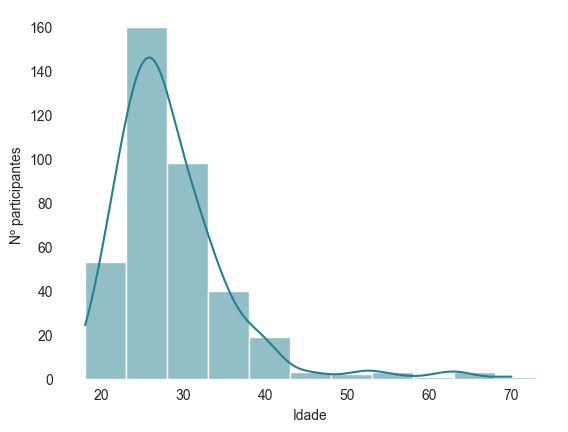

In [10]:
#| echo: False
sns.set_style("white")
p = sns.histplot(data, x = "idade_participacao", binwidth= 5, kde = True, color = sns.color_palette("viridis")[2])
p.set(xlabel = "Idade", ylabel = "Nº participantes")
sns.despine(left = True, bottom = True);

<div style = "text-align: justify">&emsp;Nota-se que a curva da distribuição é assimétrica positiva, ou seja, os valores se concentram a esquerda da escala. Isso demonstra que há mais candidatos entre 20 e 40 anos do que 40 a 70 anos. Podemos verificar se isso também ocorre ao comparar as idades em relação ao gênero. </div>

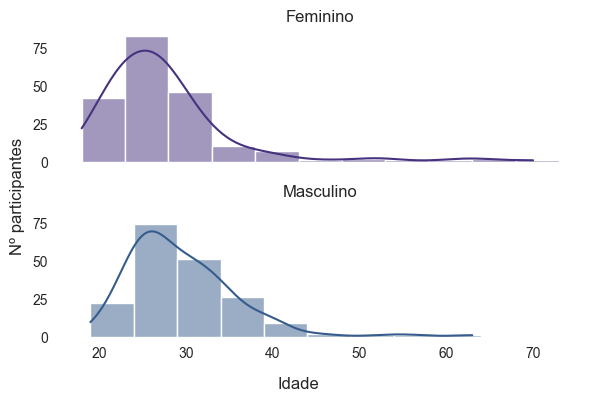

In [11]:
#| echo: False
p = sns.FacetGrid(data, row = 'genero', height= 2, aspect=3, hue = "genero", palette=sns.color_palette("viridis"))
p.map(sns.histplot, "idade_participacao", binwidth = 5, kde = True)
p.set_axis_labels("", "")
p.fig.supxlabel("Idade")
p.fig.supylabel("Nº participantes")
axes = p.axes.flatten()
axes[1].set_title("Masculino")
axes[0].set_title("Feminino")
p.despine(bottom = True, left = True);

<div style = "text-align: justify">&emsp;Como no caso anterior, ainda há uma predominancia de participantes entre 20 e 40 anos. Além disso, é possível notar que, no caso de pessoas do gênero feminino, a curva está ainda mais enviesada para a esquerda. Podemos concluir que pessoas do gênero feminino tendem a entrar na casa com idades inferiores às de gênero masculino.</div>

<div style = "text-align: justify">&emsp;E em relação as temporadas, será que a idade dos participantes costuma variar de acordo com a edição?</div>

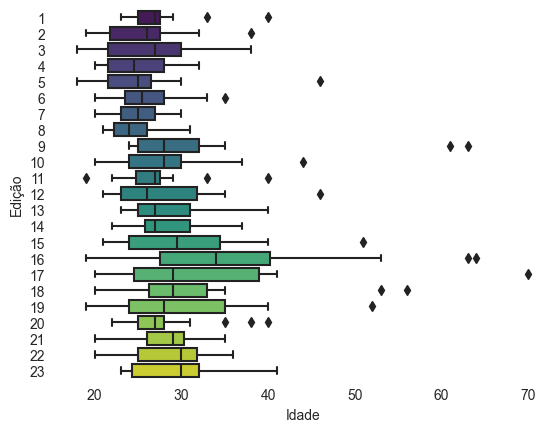

In [12]:
#| echo: False
plot = sns.boxplot(data = data, y = "edicao", x = "idade_participacao", palette = "viridis")
plot.set(xlabel = "Idade", ylabel = "Edição")
sns.despine(left = True, bottom = True)

<div style = "text-align: justify">&emsp;Algumas edições, como a 1ª ou a 11ª, apresentaram baixíssima variação de idade, tendo 75% dos participantes com até 30 anos. Já a edição 16 foi a que apresentou maior variação de idade, tendo uma mediana maior que as outras.</div>

<div style = "text-align: justify">&emsp;Ainda com base na idade, podemos verificar, por curiosidade, como se distribui os signos dos participantes (ou período em que eles nasceram).</div>

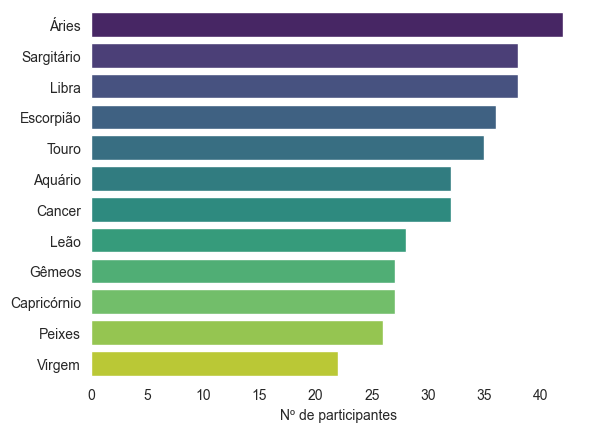

In [13]:
#| echo: False
def pegar_signo(data):
    try:
        signo = get_zodiac_sign(data)
        return signo
    except:
        return None


data['signo'] = data.apply(lambda row: pegar_signo(row['data_nascimento']), axis = 1)
plot = sns.countplot(y = data_raw['signo'], order = data_raw['signo'].value_counts().index, palette = "viridis")
plot.set(xlabel = "Nº de participantes", ylabel = "")
sns.despine(left = True, bottom = True)


<div style = "text-align: justify">&emsp; Surpreendentemente, há uma diferença bastante evidente entre a quantidade de participantes de cada signo, enquanto foram selecionadas mais de 40 pessoas do signo de Áries, apenas 22 participantes foram do signo de Virgem.</d>

### Região <a id = regiao></a>

<div style = "text-align: justify">&emsp; Agora que exploramos a idade, vamos visualizar se há preferência por participantes de determinada região.</div>

In [15]:
#| echo: False
import requests as re
ibge = re.get("https://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=maxima&intrarregiao=UF")
geodata = gpd.read_file(ibge.text)
siglas = {
"12": ["AC", "Acre"],
"27": ["AL", "Alagoas"],
"13": ["AM", "Amazonas"],
"16": ["AP", "Amapá"],
"29": ["BA", "Bahia"],
"23": ["CE", "Ceará"],
"53": ["DF", "Distrito Federal"],
"32": ["ES", "Espírito Santo"],
"52": ["GO", "Goiás"],
"21": ["MA", "Maranhão"],
"31": ["MG", "Minas Gerais"],
"50": ["MS", "Mato Grosso do Sul"],
"51": ["MT", "Mato Grosso"],
"15": ["PA", "Pará"],
"25": ["PB", "Paraíba"],
"26": ["PE", "Pernambuco"],
"22": ["PI", "Piauí"],
"41": ["PR", "Paraná"],
"33": ["RJ", "Rio de Janeiro"],
"24": ["RN", "Rio Grande do Norte"],
"11": ["RO", "Rondônia"],
"14": ["RR", "Roraima"],
"43": ["RS", "Rio Grande do Sul"],
"42": ["SC", "Santa Catarina"],
"28": ["SE", "Sergipe"],
"35": ["SP", "São Paulo"],
"17": ["TO", "Tocantins"]
}

geodata['estado'] = geodata['codarea'].map(siglas)
geodata[["sigla", "estado"]] = pd.DataFrame(geodata['estado'].tolist(), index = geodata.index).reset_index(drop = True)
geodata['estado'] = geodata['estado'].str.strip()
estado_count = pd.DataFrame(data['estado'].value_counts().reset_index()).rename(columns = {"index": "estado", "estado": "count"})
estado_count['estado'] = estado_count['estado'].str.strip()
mapa_count = geodata.merge(estado_count, how = "left", on = 'estado').fillna(0)
mapa_count['count'] = mapa_count['count'].astype('float')

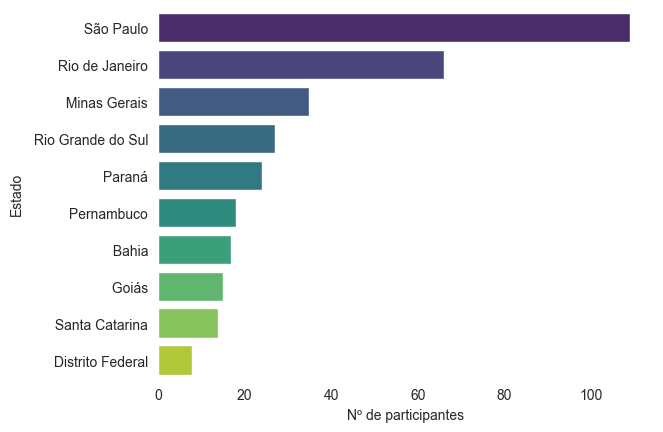

In [32]:
#| echo: False
plot = sns.countplot(data, y = "estado", order=data['estado'].value_counts().iloc[:10].index, palette="viridis")
plot.set(xlabel = "Nº de participantes", ylabel = "Estado")
sns.despine(left = True, bottom = True)

<div style = "text-align: justify">&emsp;Visualizando os dados de forma espacial, se nota ainda mais a predominância das regiões sudeste e sul.</div>

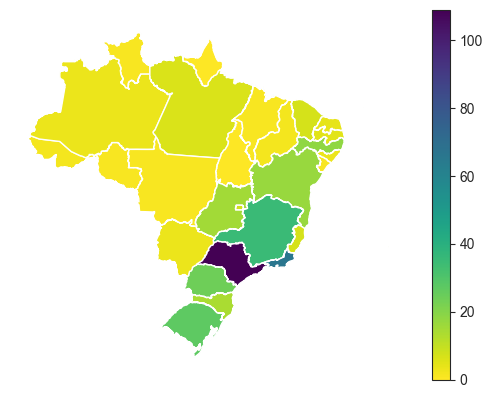

In [33]:
#|echo: False
ax = mapa_count.dissolve("codarea").reset_index().plot(column = "count", cmap = "viridis_r", legend = True, edgecolor = "white")
ax.spines[["top", "left", "bottom", "right"]].set_visible(False)
plt.axis("off");

<div style = "text-align: justify">&emsp; Podemos ainda verificar se há alguma cidade com maior frequência</div>

In [34]:
data['municipio'].value_counts().iloc[:10]

São Paulo         59
Rio de Janeiro    48
Belo Horizonte    17
Recife            12
Curitiba          10
Goiânia           10
Brasília           8
Salvador           8
Porto Alegre       8
Ribeirão Preto     6
Name: municipio, dtype: Int64

<div style = "text-align: justify">&emsp;Como esperado, as capitais dos estados, e com mais habitantes, são os municipios mais frequêntes.</div>

<div style = "text-align: justify">&emsp; Assim, o estado de São Paulo, e as regiões Sudeste/Sul parecem ser bem mais preferidas que a outras regiões, principalmente a Norte, que teve pouquissimos candidatos. Suas chances aumentam ainda mais se você morar na capital do estado.</div>

### Ocupação

<div style = "text-align: justify">&emsp;Após o final do programa, é normal que os participantes adquiram uma nova profissão: "Ex-BBB", mas antes disso, quais profissões têm mais chance de serem selecionadas?</div>

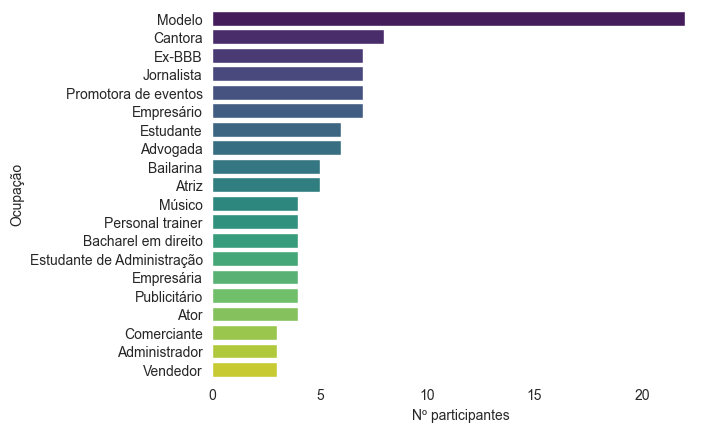

In [39]:
#| echo: False
data['ocupacao'].str.lower().str.replace(" e ", ",").str.split(",").explode().value_counts()
plot = sns.countplot(data, y = "ocupacao", order = data['ocupacao'].value_counts().iloc[:20].index, palette="viridis")
plot.set(xlabel= "Nº participantes", ylabel = "Ocupação")
sns.despine(left = True, bottom = True)


<div style = "text-align: justify">&emsp;Nota-se que algumas profissões estão separadas por gênero ou estão muito específicas (como "estudante" e "estudande de administração" ou "ator" e "atriz"). Há também alguns casos em que o participante tem mais de uma profissão, assim, vamos separar as ocupações e simplificar os nomes para termos uma noção mais geral como se distribuem.</div>

In [41]:
#| echo: False
def neutralizar_genero(row):
    profissoes = row.replace("/", ", ").replace(" e ", ", ").split(", ")
    profissoes_resumidas = []
    for i, j in enumerate(profissoes):
        profissao = unidecode(j.split(" ")[0]).lower()
        if (profissao[-1] in ["a", "o"]):
            profissao = profissao[:-1]
        elif profissao == "atriz":
            profissao = "ator"
        profissoes_resumidas.append(profissao)
    return profissoes_resumidas


data_raw['ocupacao_resumida'] = data_raw.apply(lambda row: neutralizar_genero(row['ocupacao']), axis = 1)

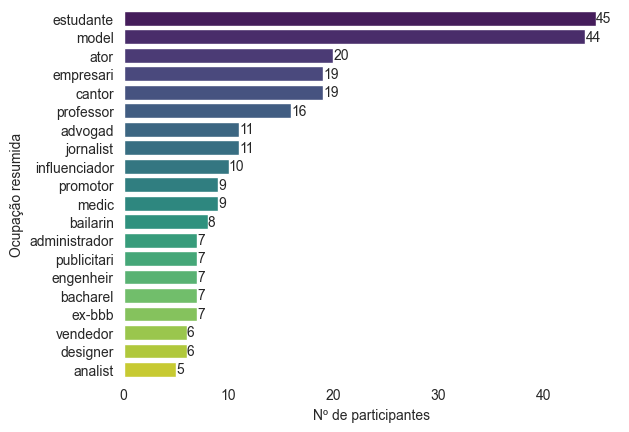

In [46]:
#| echo: False
p = sns.barplot(y = data_raw['ocupacao_resumida'].explode().value_counts().index,
            x = data_raw['ocupacao_resumida'].explode().value_counts(),
            order = data_raw['ocupacao_resumida'].explode().value_counts().iloc[:20].index,
            palette = "viridis")
p.bar_label(p.containers[0]);
p.set(xlabel="Nº de participantes", ylabel = "Ocupação resumida")
sns.despine(left = True, bottom= True)

Portanto, parece haver uma preferência maior por pessoas estudantes e modelos.

## Conclusão

<div style = "text-align: justify">&emsp; Assim, podemos concluir nossa análise agregando todas as informações da nossa exploração. O candidato ideal baseado nos participantes das outras edições seria:</div>

- Idade: 25 a 30 anos
- Data de nascimento: Signo de Sagitário, Áries ou Libra
- Local de nascimento: Nascido no sudeste, principalmente no estado de Sâo Paulo e na capital
- Profissão: Estudante ou modelo

<div style = "text-align: justify">&emsp; Portanto, se você possui essas características, talvez seja uma boa opção tentar se inscrever no programa e, quem sabe, ser o mais novo milionário do Brasil.</div> 


<div style = "text-align: justify">&emsp; Espero que tenha gostado dessa exploração básica dos dados do BBB e qualquer dúvida, critica ou sugestão podem ser feitas pelo GitHub (@souzadecarlos) ou pelo twitter (@crls_h).</div>

 <a href="#top">Back to top</a>